# Tratamiento de variables categoricas

In [54]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [168]:
path = '/home/giovannyencinia/Documents/datasets/MACHINE_LEARNING_course/ecom-expense/Ecom Expense.csv'

In [169]:
ecom = pd.read_csv(path)

In [170]:
ecom.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [171]:
dummy_gender = pd.get_dummies(ecom.Gender, prefix='Gender', drop_first = True)
dummy_city = pd.get_dummies(ecom['City Tier'], prefix='City', drop_first = True)

In [172]:
ecom = pd.concat([ecom, dummy_gender, dummy_city], axis = 1)
ecom

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2357,TXN2358,50,7,5705,460.157207,3,Male,Tier 2,2909.619546,1,1,0
2358,TXN2359,35,11,11202,851.924751,8,Male,Tier 2,7968.633136,1,1,0
2359,TXN2360,27,5,21335,435.145358,8,Female,Tier 3,8816.406448,0,0,1
2360,TXN2361,45,12,19294,658.439838,7,Female,Tier 1,7915.595856,0,0,0


In [173]:
feature = ['Monthly Income', 'Transaction Time', 'Record',
           'Gender_Male',
           'City_Tier 2', 'City_Tier 3']

In [174]:
X = ecom[feature]
y = ecom['Total Spend']
X

,Monthly Income,Transaction Time,Record,Gender_Male,City_Tier 2,City_Tier 3
0,7313,627.668127,5,0,0,0
1,17747,126.904567,3,0,1,0
2,22845,873.469701,2,1,1,0
3,18552,380.219428,7,0,0,0
4,14439,403.374223,2,0,1,0
...,...,...,...,...,...,...
2357,5705,460.157207,3,1,1,0
2358,11202,851.924751,8,1,1,0
2359,21335,435.145358,8,0,0,1
2360,19294,658.439838,7,0,0,0


In [175]:
# Define model
model_econ = LinearRegression()
# fit model
model_econ.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [176]:
coef_inter = list(zip(feature, model_econ.coef_))
coef_inter

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.15494612549589748),
 ('Record', 772.2334457445636),
 ('Gender_Male', 262.05002651109294),
 ('City_Tier 2', -21.625351701262737),
 ('City_Tier 3', -208.66762633022307)]

In [177]:
model_econ.score(X, y) # R^2

0.9179923586131016

In [178]:
y_prediction = model_econ.predict(X)

In [179]:
ecom['Prediction'] = pd.Series(y_prediction)

In [180]:
ecom

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3,Prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0,3581.980335
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,TXN2358,50,7,5705,460.157207,3,Male,Tier 2,2909.619546,1,1,0,3336.456655
2358,TXN2359,35,11,11202,851.924751,8,Male,Tier 2,7968.633136,1,1,0,8069.348522
2359,TXN2360,27,5,21335,435.145358,8,Female,Tier 3,8816.406448,0,0,1,9050.690358
2360,TXN2361,45,12,19294,658.439838,7,Female,Tier 1,7915.595856,0,0,0,8220.596094


In [181]:
SSD = np.sum((y_prediction - ecom['Total Spend'])**2)

In [182]:
SSD

1517733985.3408165

In [183]:
RSE = np.sqrt(SSD/(ecom.shape[0] - 1 - len(feature)))

In [184]:
RSE

802.7907758991205

In [185]:
error = RSE/np.mean(ecom['Total Spend'])

In [186]:
error

0.1302560111403038

# Transformación de variables para conseguir una relación no lineal

In [45]:
import pandas as pd
root = '/home/giovannyencinia/Documents/datasets/MACHINE_LEARNING_course'
path = root + '/auto/auto-mpg.csv'
auto = pd.read_csv(path)

In [46]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [48]:
np.sum(auto.mpg.isna())
auto.mpg.mean()

23.514572864321615

In [50]:
import matplotlib.pyplot as plt
auto.mpg = auto.mpg.fillna(auto.mpg.mean())
auto.horsepower = auto.horsepower.fillna(auto.horsepower.mean())
auto.mpg

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
401    27.0
402    44.0
403    32.0
404    28.0
405    31.0
Name: mpg, Length: 406, dtype: float64

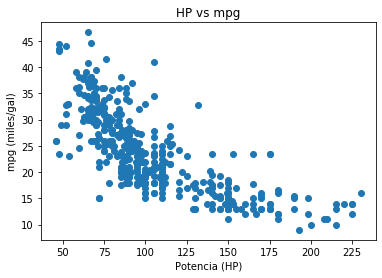

In [51]:
plt.scatter(auto.horsepower, auto.mpg)
plt.xlabel('Potencia (HP)')
plt.ylabel('mpg (miles/gal)')
plt.title('HP vs mpg');

**Modelo de regresion lineal**

$mpg = a + b*horsepower$


In [52]:
X = auto.horsepower
y = auto.mpg

In [69]:
# Define model
auto_model = LinearRegression()
auto_model.fit(X[:, np.newaxis], y)
y_pred = auto_model.predict(X[:, np.newaxis])

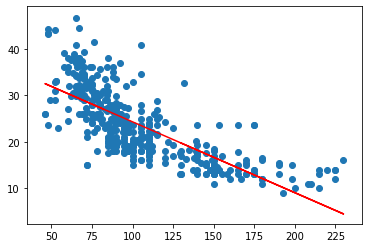

In [70]:
plt.plot(X, y_pred, 'r')
plt.scatter(X, y);

In [76]:
R_2 = auto_model.score(X[:, np.newaxis], y)

In [77]:
SSD = np.sum((y - y_pred)**2)

In [78]:
RSE = np.sqrt(SSD/(auto.shape[0]-1))

In [79]:
print(f"R^2 = {R_2} \nSSD = {SSD} \nRSE = {RSE}")

R^2 = 0.574653340645025 
SSD = 10315.75196006092 
RSE = 5.046879480825511


In [81]:
error = RSE/y.mean()

In [82]:
error

0.21462773361633458

# Modelo de regresion cuadratico

In [83]:
X = X[:, np.newaxis] ** 2

In [86]:
#Define model
auto_model = LinearRegression()
#fit model
auto_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
auto_model.score(X, y)

0.4849887034823205

# Modelo de regresion cuadratico y lineal

In [90]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [91]:
poly = PolynomialFeatures(degree=2)
X_data = poly.fit_transform(auto.horsepower[:, np.newaxis])

In [94]:
#define 
auto_model3 = LinearRegression()
#fit
auto_model.fit(X_data, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
auto_model.score(X_data, y)

0.6439066584257469

In [100]:
X_data

array([[1.0000e+00, 1.3000e+02, 1.6900e+04],
       [1.0000e+00, 1.6500e+02, 2.7225e+04],
       [1.0000e+00, 1.5000e+02, 2.2500e+04],
       ...,
       [1.0000e+00, 8.4000e+01, 7.0560e+03],
       [1.0000e+00, 7.9000e+01, 6.2410e+03],
       [1.0000e+00, 8.2000e+01, 6.7240e+03]])

In [101]:
auto_model.coef_

array([ 0.        , -0.43404318,  0.00112615])

In [102]:
auto_model.intercept_

55.02619244708117

# El problema de los outliers